### Tensor With Pytorch

In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.2.2+cu121


In [2]:
## Scalar
scalar = torch.tensor(7)
print(scalar)

## Get tensor back as python int
scalar.item()

tensor(7)


7

In [3]:
## Vector 

vector = torch.tensor([1, 2, 3])
vector

tensor([1, 2, 3])

In [4]:
print(vector.ndim)
print(vector.shape)

1
torch.Size([3])


In [5]:
# Matrix

Matrix = torch.tensor([[1, 2], [3, 4]])

Matrix


tensor([[1, 2],
        [3, 4]])

In [6]:
print(Matrix.ndim)
print(Matrix.shape)

2
torch.Size([2, 2])


In [7]:
# Tensor 

Tensor = torch.tensor([[[1, 2, 4], [3, 4, 7] , [5, 6, 9]]])

Tensor

tensor([[[1, 2, 4],
         [3, 4, 7],
         [5, 6, 9]]])

In [8]:
print(Tensor.ndim)
print(Tensor.shape)

3
torch.Size([1, 3, 3])


In [9]:
### Random tensor

random = torch.rand(3, 4)
random

tensor([[0.6651, 0.7607, 0.1690, 0.3163],
        [0.9473, 0.0257, 0.6591, 0.5668],
        [0.0146, 0.1181, 0.5000, 0.1265]])

In [10]:
# tensor range

arange = torch.arange(start= 1, end= 10, step= 2)
arange

tensor([1, 3, 5, 7, 9])

In [11]:
# tensor 0s

zeros = torch.zeros_like(arange)
zeros

tensor([0, 0, 0, 0, 0])

In [12]:
#### Cuda 

device = "cuda" if torch.cuda.is_available() else "cpu"

print("device", device)


tensor_CPU = torch.tensor([[1, 2], [3, 4]], device = "cpu")

print(tensor_CPU, tensor_CPU.device, "\n")

tensor_GPU = tensor_CPU.to(device)
print(tensor_GPU)

#### We can't convert tensor in numpy array if tensor is on GPU 

tensor_back = tensor_GPU.cpu().numpy()
print(tensor_back)

device cuda
tensor([[1, 2],
        [3, 4]]) cpu 

tensor([[1, 2],
        [3, 4]], device='cuda:0')
[[1 2]
 [3 4]]


In [13]:
# tensor Float 32 

tensor_float_32 = torch.tensor([[3.14, 5.6], [4.34, 5.34]],
                               dtype=None,
                               device='cuda',
                               requires_grad=False)
tensor_float_32, tensor_float_32.dtype, tensor_float_32.device

(tensor([[3.1400, 5.6000],
         [4.3400, 5.3400]], device='cuda:0'),
 torch.float32,
 device(type='cuda', index=0))

In [14]:
%%time
tensor_float_16 = torch.tensor([[3.14, 5.6], [4.34, 5.34]],
                               dtype=torch.float16,
                               device='cpu',
                               requires_grad=False)

tensor_float_16, tensor_float_16.dtype, tensor_float_16.device

CPU times: total: 0 ns
Wall time: 0 ns


(tensor([[3.1406, 5.6016],
         [4.3398, 5.3398]], dtype=torch.float16),
 torch.float16,
 device(type='cpu'))

### Tensor Operations

In [15]:
tensor = torch.tensor([1, 3 , 5],)
print("Summ", tensor + 10)  
print("Mul", tensor * 10)  
print("Sub", tensor - 10) 
print("Div", tensor / 10)

Summ tensor([11, 13, 15])
Mul tensor([10, 30, 50])
Sub tensor([-9, -7, -5])
Div tensor([0.1000, 0.3000, 0.5000])


In [16]:
# Matrix for Matrix

tensor_matrix = torch.tensor([[1, 2], [3, 4]])
tensor_matrix2 = torch.tensor([[6, 7], [9, 4]])

print("Sum", torch.add(tensor_matrix, tensor_matrix2), "\n")  
print("Mul", torch.matmul(tensor_matrix, tensor_matrix2), "\n")  
print("Sub", torch.subtract(tensor_matrix, tensor_matrix2), "\n") 
print("Div", torch.div(tensor_matrix, tensor_matrix2), "\n")
print("Min", torch.min(tensor_matrix), "\n")
print("Max", torch.max(tensor_matrix), "\n")
print("Mean", torch.mean(tensor_matrix.type(torch.float32)), tensor_matrix.type(torch.float32).mean(),"\n")



Sum tensor([[ 7,  9],
        [12,  8]]) 

Mul tensor([[24, 15],
        [54, 37]]) 

Sub tensor([[-5, -5],
        [-6,  0]]) 

Div tensor([[0.1667, 0.2857],
        [0.3333, 1.0000]]) 

Min tensor(1) 

Max tensor(4) 

Mean tensor(2.5000) tensor(2.5000) 



In [17]:
#### For find the position min and max

tensorr = torch.tensor([1, 23, 24, 54, 234, 12, 43, 54])
print(tensorr, "Shape", tensorr.shape)

print("Position Min Value", tensorr.argmin(), tensorr[0])

print("Position Max Value", tensorr.argmax(), tensorr[4])


tensor([  1,  23,  24,  54, 234,  12,  43,  54]) Shape torch.Size([8])
Position Min Value tensor(0) tensor(1)
Position Max Value tensor(4) tensor(234)


In [18]:
### Reshaping Tensor

print("shape tensor :",tensorr.shape, tensorr)

tensor_reshaped = tensorr.reshape(4, 2)

print("shape tensor reshaped :",tensor_reshaped.shape, tensor_reshaped)

print(tensor_reshaped.view(1,8))


shape tensor : torch.Size([8]) tensor([  1,  23,  24,  54, 234,  12,  43,  54])
shape tensor reshaped : torch.Size([4, 2]) tensor([[  1,  23],
        [ 24,  54],
        [234,  12],
        [ 43,  54]])
tensor([[  1,  23,  24,  54, 234,  12,  43,  54]])


In [19]:
#### Stacking Tensor

tensor_stack = torch.stack([tensorr, tensorr, tensorr, tensorr])
print('tensor_stack', tensor_stack)

tensor_stack tensor([[  1,  23,  24,  54, 234,  12,  43,  54],
        [  1,  23,  24,  54, 234,  12,  43,  54],
        [  1,  23,  24,  54, 234,  12,  43,  54],
        [  1,  23,  24,  54, 234,  12,  43,  54]])


In [20]:
####  Squeezing, Unsqueezing, Tensor

tensor_unsqueezed = tensorr.unsqueeze(0)
print('tensor_unsqueezed', tensor_unsqueezed)

tensor_squeezed = tensor_unsqueezed.squeeze(dim = 0)
print('tensor_squeezed', tensor_squeezed)

tensor_unsqueezed tensor([[  1,  23,  24,  54, 234,  12,  43,  54]])
tensor_squeezed tensor([  1,  23,  24,  54, 234,  12,  43,  54])


In [21]:
# Transpose

print(Matrix, "\n")


Matrix = Matrix.transpose(0,1)

print(Matrix)

tensor([[1, 2],
        [3, 4]]) 

tensor([[1, 3],
        [2, 4]])


In [22]:
# Tensor for Tensor

Tensor1 = torch.rand(3, 2)
Tensor2 = torch.rand(2, 3)

## @ == torch.matmul
Tensor_Result = Tensor1 @ Tensor2

print("Size Tensor result: ",Tensor_Result.shape)


Tensor11 = torch.rand(9, 3)
Tensor22 = torch.rand(3, 9)

## torch.mm == torch.matmul
Tensor_Result2 = torch.mm(Tensor11, Tensor22)

print("Size Tensor2 result: ",Tensor_Result2.shape)

Size Tensor result:  torch.Size([3, 3])
Size Tensor2 result:  torch.Size([9, 9])


In [23]:
# Image tensor random
image = torch.rand(255,255,3)
image.shape, image

(torch.Size([255, 255, 3]),
 tensor([[[0.0798, 0.2322, 0.6267],
          [0.1918, 0.7754, 0.0623],
          [0.0914, 0.3494, 0.0153],
          ...,
          [0.6426, 0.8890, 0.5135],
          [0.7962, 0.5479, 0.8583],
          [0.6158, 0.5449, 0.6163]],
 
         [[0.0325, 0.5982, 0.6494],
          [0.4719, 0.8773, 0.6732],
          [0.3335, 0.5609, 0.3685],
          ...,
          [0.5622, 0.7255, 0.1751],
          [0.0384, 0.8747, 0.3929],
          [0.3069, 0.8227, 0.4224]],
 
         [[0.1772, 0.8171, 0.7798],
          [0.3967, 0.3515, 0.9652],
          [0.3559, 0.1155, 0.7419],
          ...,
          [0.8339, 0.0158, 0.4776],
          [0.7142, 0.9305, 0.7429],
          [0.7444, 0.6397, 0.6778]],
 
         ...,
 
         [[0.9509, 0.4708, 0.0775],
          [0.0718, 0.1466, 0.7179],
          [0.9944, 0.2800, 0.1338],
          ...,
          [0.7938, 0.5075, 0.2528],
          [0.0585, 0.7912, 0.0054],
          [0.2843, 0.3084, 0.0246]],
 
         [[0.9783, 0

In [24]:
#### Numpy Array to Torch Tensor

numpy_array = np.random.randint(0,255,(3,3))
print("Array \n", numpy_array, "\n")
tensor = torch.from_numpy(numpy_array).type(torch.float32)
print("Tensor \n",tensor ,"\n")


Array 
 [[149  12  26]
 [111 176  89]
 [148 173 197]] 

Tensor 
 tensor([[149.,  12.,  26.],
        [111., 176.,  89.],
        [148., 173., 197.]]) 



In [25]:
#### Tensor to Numpy

tensor2 = torch.ones(4,4)

numpy_tensor = tensor2.numpy()

print(tensor2,"\n\n\n", numpy_tensor)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]) 


 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [26]:
#### Random Seed

RANDOM_SEED = 55

torch.manual_seed(RANDOM_SEED)
tensor_with_seed = torch.rand(4,4)



torch.manual_seed(RANDOM_SEED)
tensor_with_seed2 = torch.rand(4,4)

print(tensor_with_seed == tensor_with_seed2)

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


#  Image generation

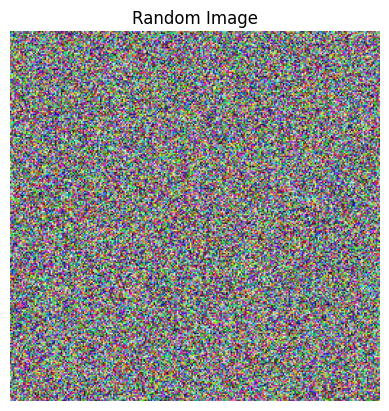

In [27]:
plt.imshow(image)
plt.axis('off') 
plt.title('Random Image')
plt.show()

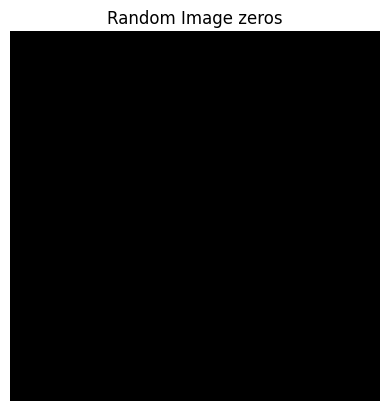

In [28]:
### Black Image
image_0 = torch.zeros_like(image)
plt.imshow(image_0)
plt.axis('off')
plt.title('Random Image zeros')
plt.show()

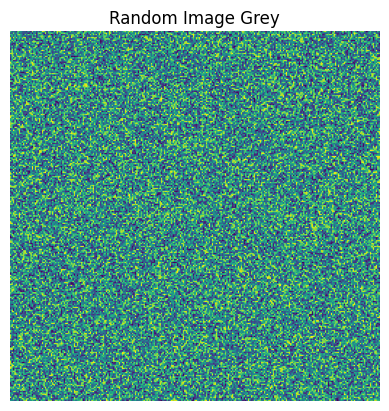

In [29]:
image_grey = torch.rand(255,255)
plt.imshow(image_grey)
plt.axis('off')
plt.title('Random Image Grey')
plt.show()